In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Load Datasets

In [2]:
holiday=pd.read_csv("../input/store-sales-time-series-forecasting/holidays_events.csv")
oil=pd.read_csv("../input/store-sales-time-series-forecasting/oil.csv")
sample_submission=pd.read_csv("../input/store-sales-time-series-forecasting/sample_submission.csv")
stores=pd.read_csv("../input/store-sales-time-series-forecasting/stores.csv")
test=pd.read_csv("../input/store-sales-time-series-forecasting/test.csv")
train=pd.read_csv("../input/store-sales-time-series-forecasting/train.csv")
transactions=pd.read_csv("../input/store-sales-time-series-forecasting/transactions.csv")

In [3]:
print ("Training Data Shape: ", train.shape)
print ("Testing Data Shape: ", test.shape)
train.head()

Training Data Shape:  (3000888, 6)
Testing Data Shape:  (28512, 5)


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0


# Merging Datasets

Several supplement files are provided which contain addition features, which can be cobined to training and test datasets(original).

In [4]:
train1 = train.merge(oil, on = 'date', how='left')
train1 = train1.merge(holiday, on = 'date', how='left')
train1 = train1.merge(stores, on = 'store_nbr', how='left')
train1 = train1.merge(transactions, on = ['date', 'store_nbr'], how='left')
train1 = train1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})

test1 = test.merge(oil, on = 'date', how='left')
test1 = test1.merge(holiday, on = 'date', how='left')
test1 = test1.merge(stores, on = 'store_nbr', how='left')
test1 = test1.merge(transactions, on = ['date', 'store_nbr'], how='left')
test1 = test1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})
train1.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN


In [5]:
test1.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0,46.8,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN
1,3000889,2017-08-16,1,BABY CARE,1.0,46.8,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN
2,3000890,2017-08-16,1,BEAUTY,8.0,46.8,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN
3,3000891,2017-08-16,1,BEVERAGES,560.0,46.8,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN
4,3000892,2017-08-16,1,BOOKS,1.0,46.8,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN


# Value Count for each feature

In [6]:
train1["family"].value_counts()

AUTOMOTIVE                    92556
HOME APPLIANCES               92556
SCHOOL AND OFFICE SUPPLIES    92556
PRODUCE                       92556
PREPARED FOODS                92556
POULTRY                       92556
PLAYERS AND ELECTRONICS       92556
PET SUPPLIES                  92556
PERSONAL CARE                 92556
MEATS                         92556
MAGAZINES                     92556
LIQUOR,WINE,BEER              92556
LINGERIE                      92556
LAWN AND GARDEN               92556
LADIESWEAR                    92556
HOME CARE                     92556
HOME AND KITCHEN II           92556
BABY CARE                     92556
HOME AND KITCHEN I            92556
HARDWARE                      92556
GROCERY II                    92556
GROCERY I                     92556
FROZEN FOODS                  92556
EGGS                          92556
DELI                          92556
DAIRY                         92556
CLEANING                      92556
CELEBRATION                 

In [7]:
train1["city"].value_counts()

Quito            1018116
Guayaquil         452496
Santo Domingo     169686
Cuenca            169686
Latacunga         113124
Manta             113124
Machala           113124
Ambato            113124
Quevedo            56562
Esmeraldas         56562
Loja               56562
Libertad           56562
Playas             56562
Daule              56562
Babahoyo           56562
Cayambe            56562
Salinas            56562
Puyo               56562
Guaranda           56562
Ibarra             56562
Riobamba           56562
El Carmen          56562
Name: city, dtype: int64

In [8]:
train1["state"].value_counts()

Pichincha                         1074678
Guayas                             622182
Santo Domingo de los Tsachilas     169686
Azuay                              169686
Manabi                             169686
Cotopaxi                           113124
Tungurahua                         113124
Los Rios                           113124
El Oro                             113124
Chimborazo                          56562
Imbabura                            56562
Bolivar                             56562
Pastaza                             56562
Santa Elena                         56562
Loja                                56562
Esmeraldas                          56562
Name: state, dtype: int64

In [9]:
train1["onpromotion"].value_counts()

0.0       1382208
1.0        160079
2.0        114496
3.0         92448
4.0         82194
           ...   
975.0           1
981.0           1
1006.0          1
995.0           1
996.0           1
Name: onpromotion, Length: 991, dtype: int64

In [10]:
train1["store_type"].value_counts()

D    1018116
C     848430
A     509058
B     452496
E     226248
Name: store_type, dtype: int64

# Correlation b/w features

<AxesSubplot:>

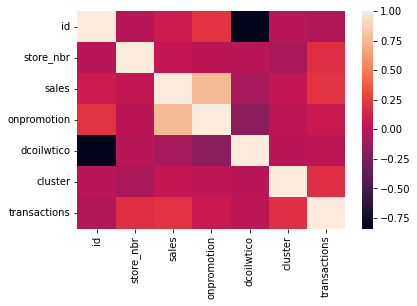

In [11]:
import seaborn as sns
corr = train1.corr()
sns.heatmap(corr)

# Visualizing closely correlated features

<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

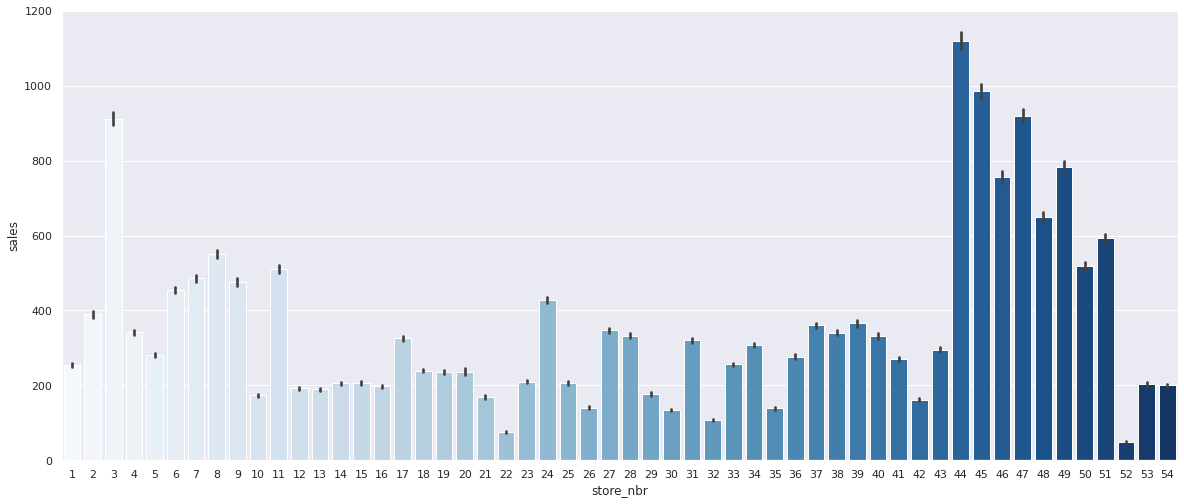

In [12]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'store_nbr',y = 'sales',data = train1,palette = "Blues")

<AxesSubplot:xlabel='store_nbr', ylabel='transactions'>

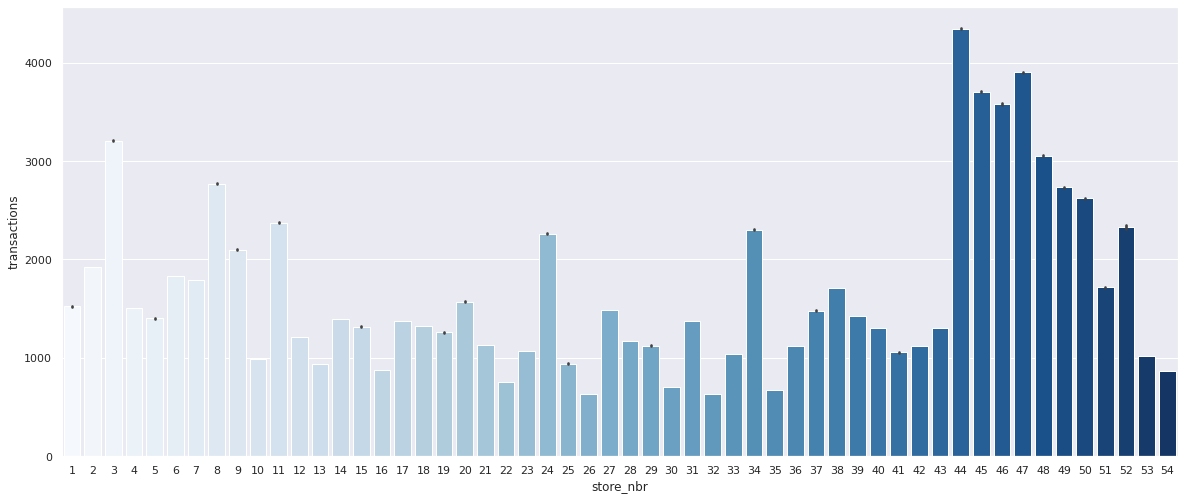

In [13]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'store_nbr',y = 'transactions',data = train1,palette = "Blues")

<AxesSubplot:xlabel='transactions', ylabel='sales'>

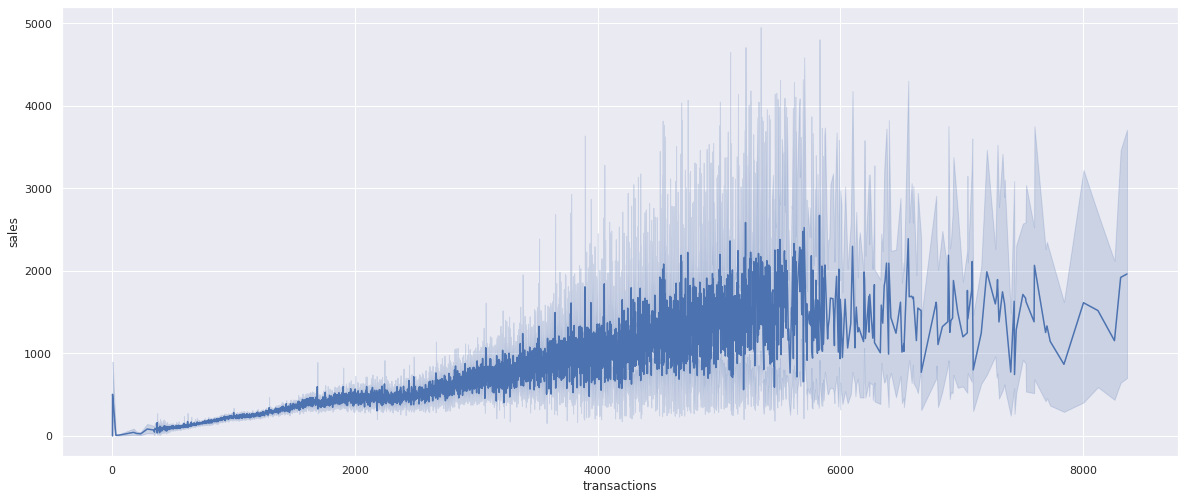

In [14]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.lineplot(x = "transactions",y = 'sales',data = train1,palette = "Blues")

<AxesSubplot:xlabel='onpromotion', ylabel='sales'>

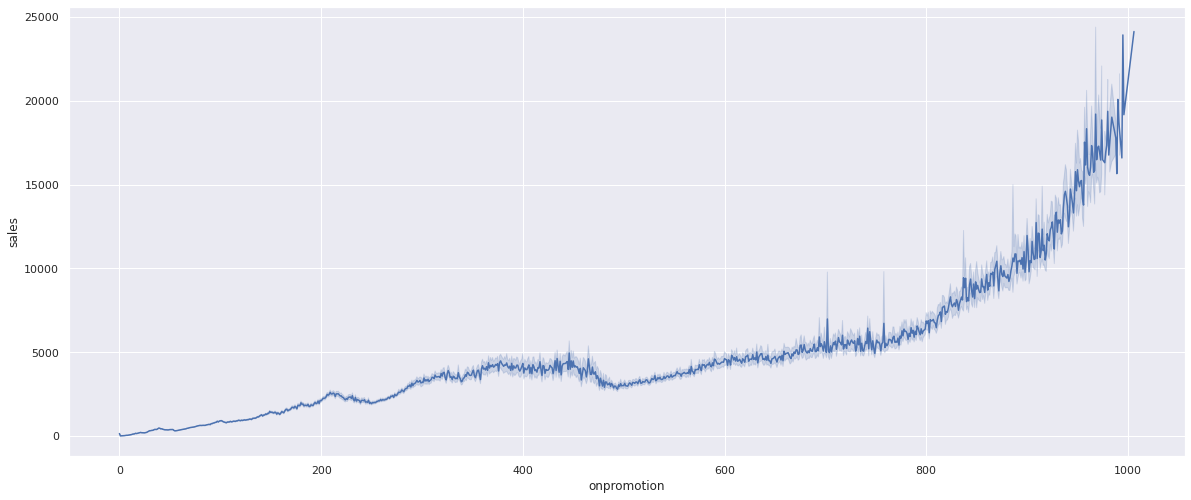

In [15]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.lineplot(x = "onpromotion",y = 'sales',data = train1,palette = "Blues")

<AxesSubplot:xlabel='cluster', ylabel='transactions'>

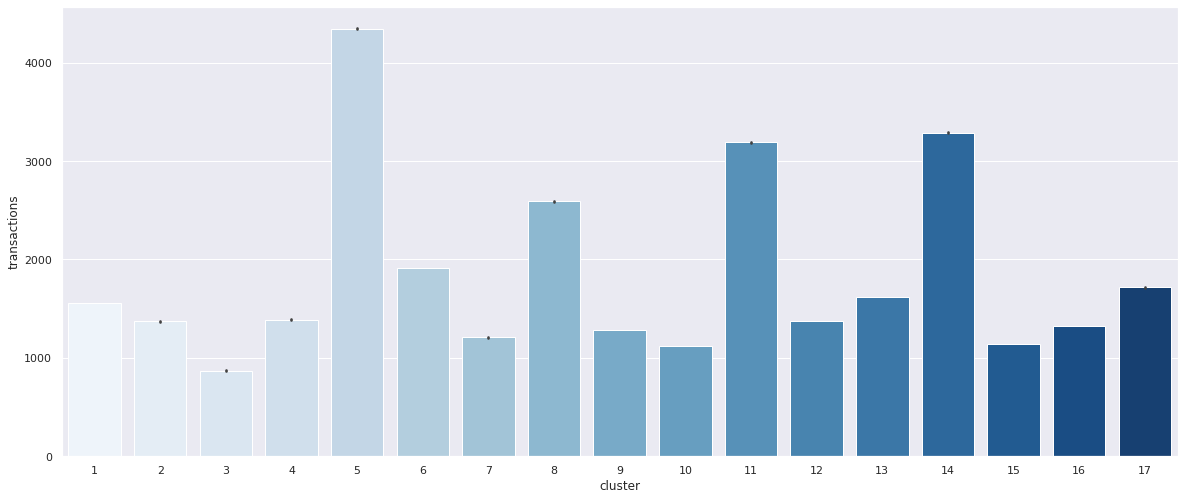

In [16]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'cluster',y = 'transactions',data = train1,palette = "Blues")

# Spilliting Dataset

In [17]:
from sklearn.model_selection import train_test_split
features=['date','store_nbr','family','onpromotion','dcoilwtico','holiday_type','locale','locale_name','description','transferred','city','state','store_type','cluster','transactions']
X=train1[features]
y=train1.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

# Feature importance plot

Feature: 0, Score: -0.00000


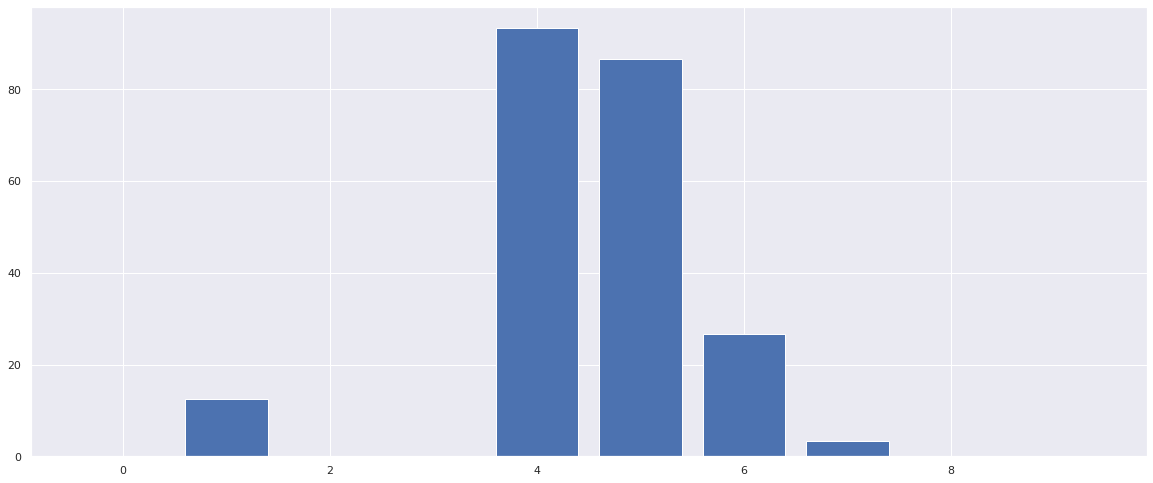

Feature: 1, Score: 12.44483


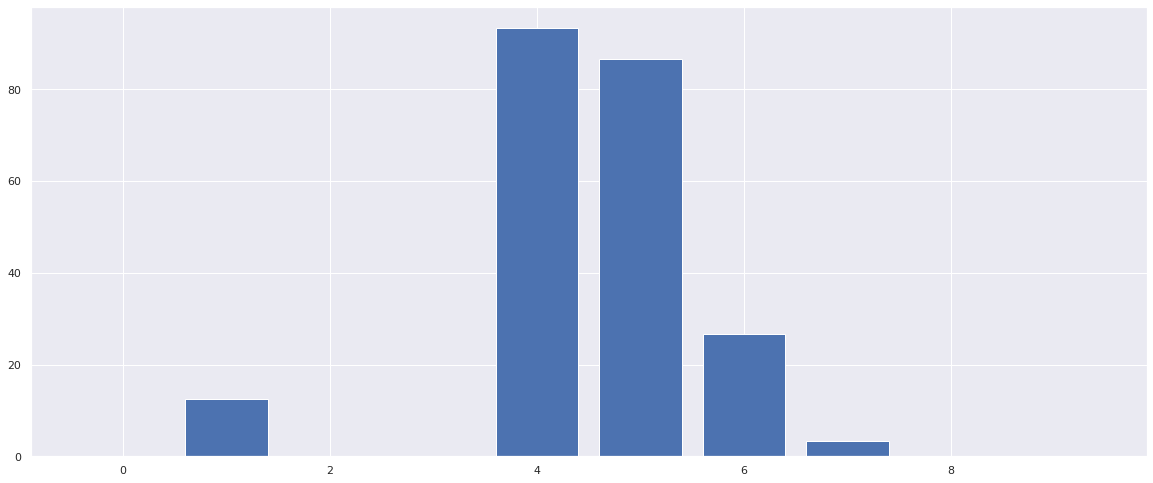

Feature: 2, Score: -0.00000


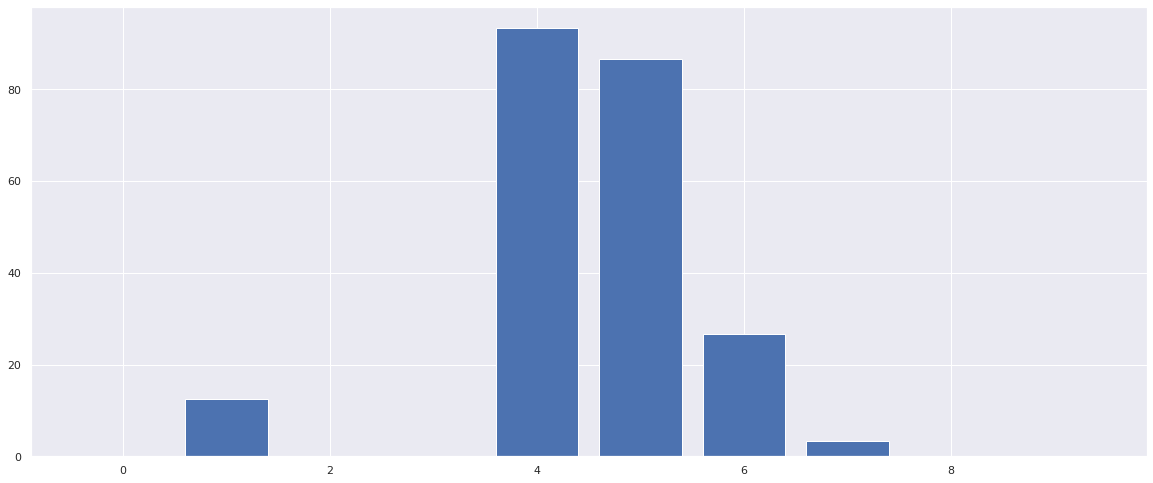

Feature: 3, Score: -0.00000


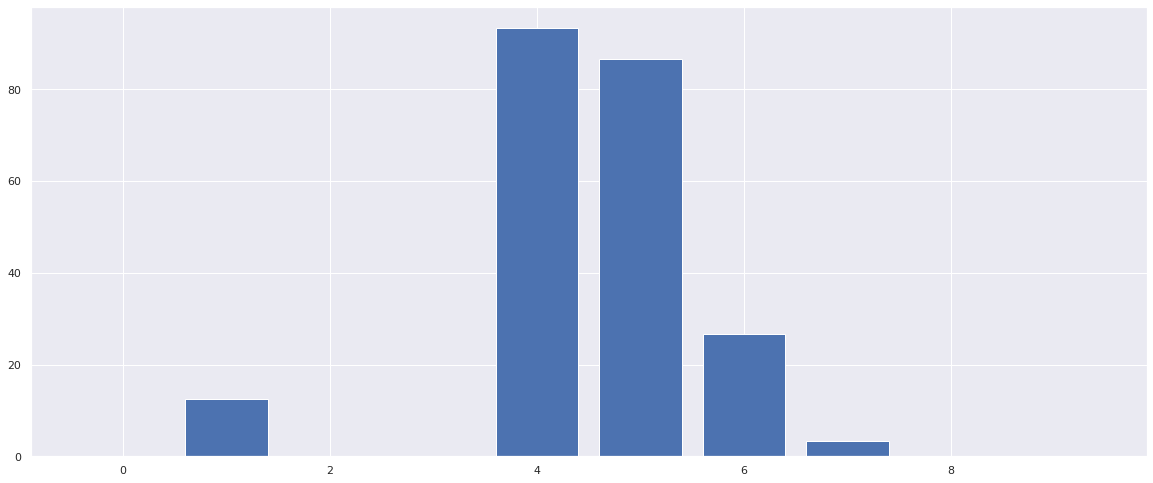

Feature: 4, Score: 93.32225


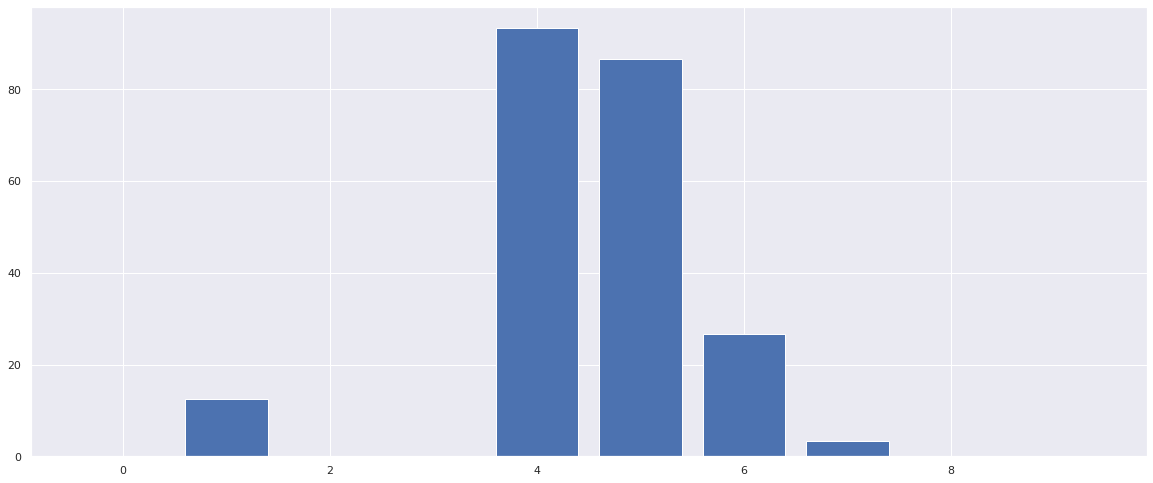

Feature: 5, Score: 86.50811


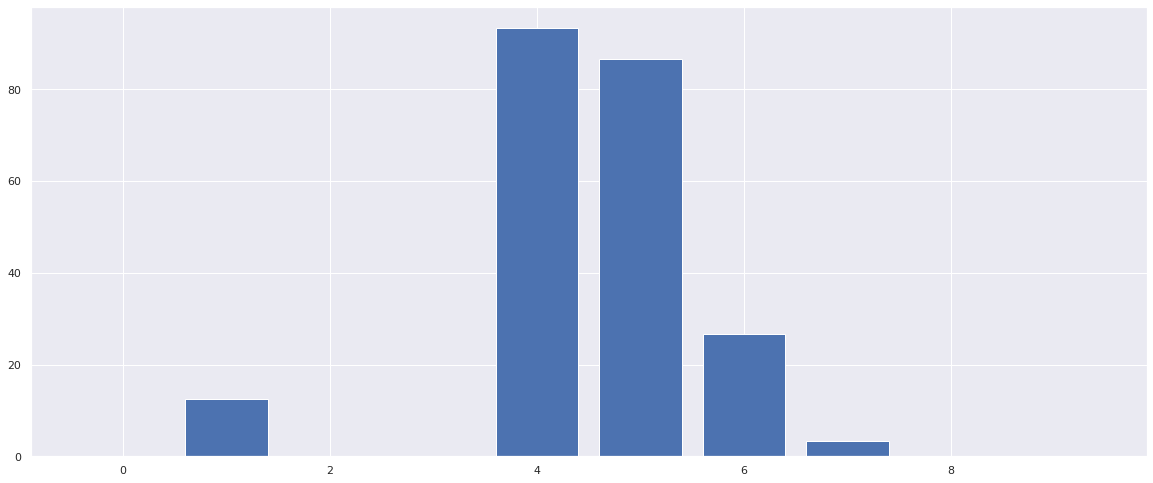

Feature: 6, Score: 26.74607


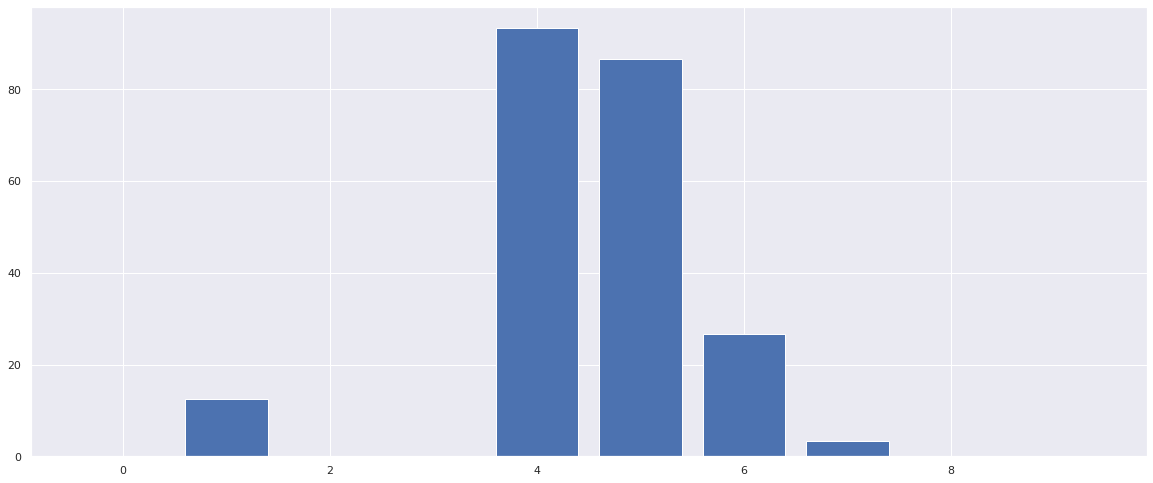

Feature: 7, Score: 3.28535


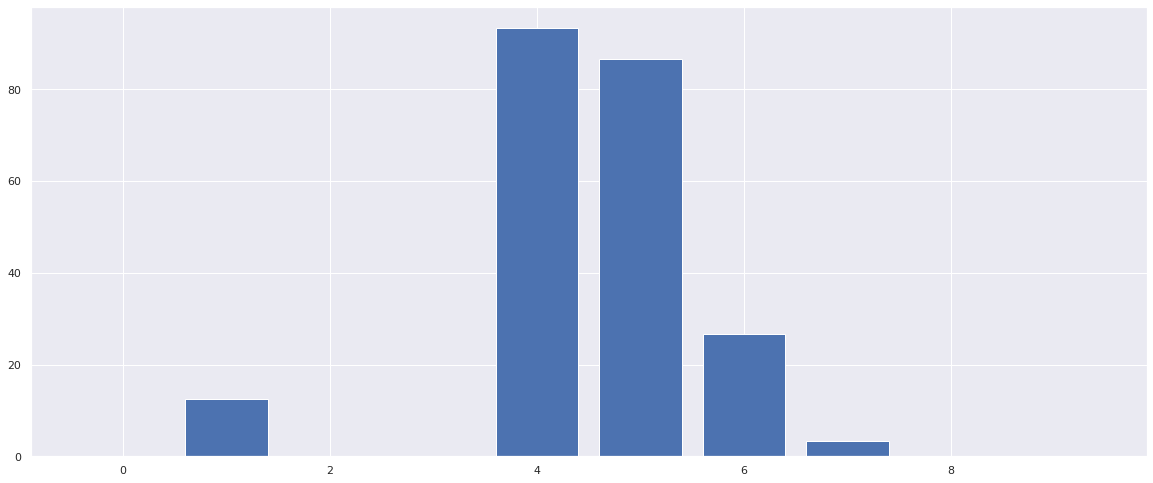

Feature: 8, Score: -0.00000


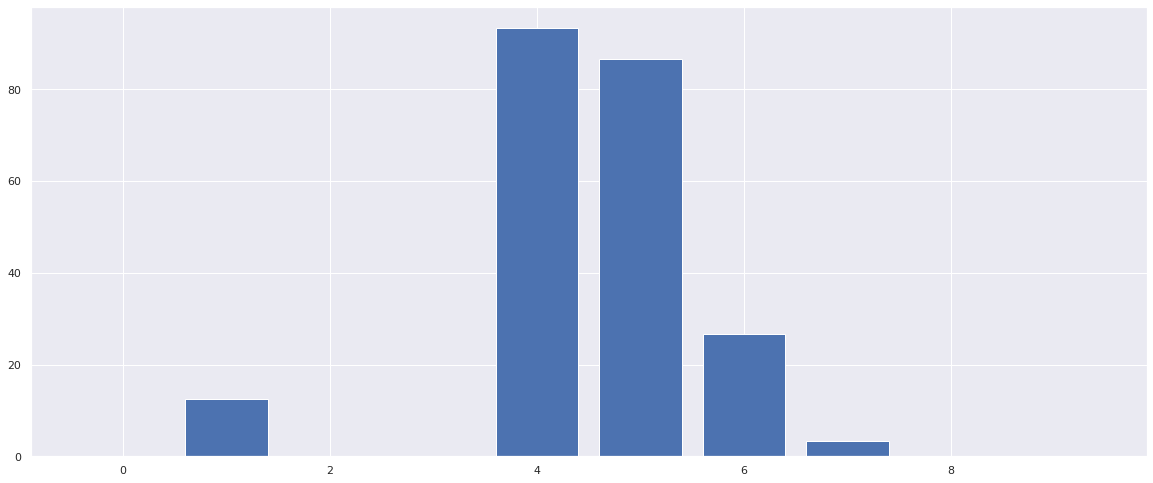

Feature: 9, Score: 0.00000


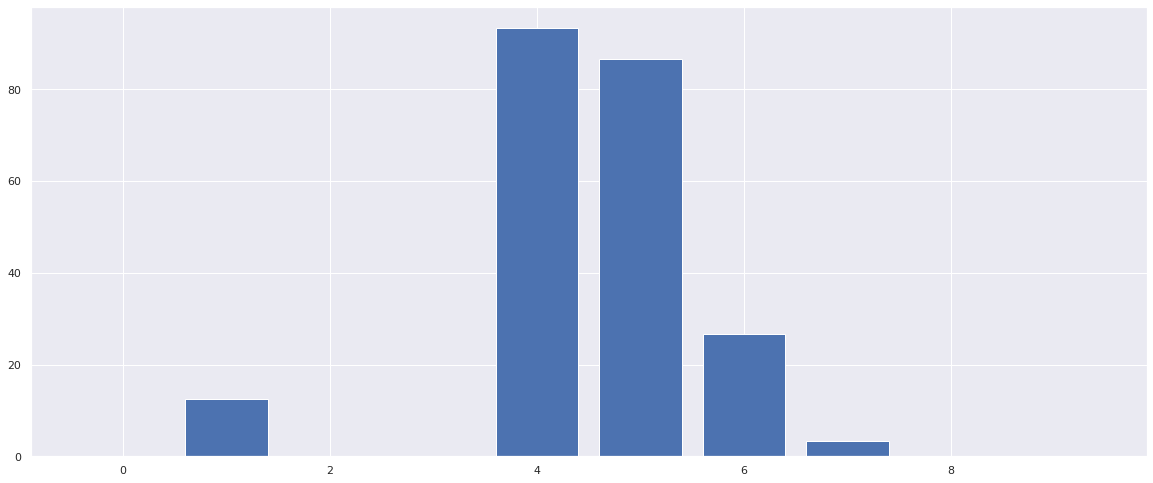

In [18]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

# Feature Engineering

In [19]:
def feature_eng(data):
    data['date'] = pd.to_datetime(data['date'])
    data['dayofweek'] = data['date'].dt.dayofweek
    data['quarter'] = data['date'].dt.quarter
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayofyear'] = data['date'].dt.dayofyear
    data['dayofmonth'] = data['date'].dt.day
    return data
    
train1 = feature_eng(train1)
test1 = feature_eng(test1)
train1.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,...,state,store_type,cluster,transactions,dayofweek,quarter,month,year,dayofyear,dayofmonth
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,NaN,Holiday,National,Ecuador,...,Pichincha,D,13,NaN,1,1,1,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0.0,NaN,Holiday,National,Ecuador,...,Pichincha,D,13,NaN,1,1,1,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0.0,NaN,Holiday,National,Ecuador,...,Pichincha,D,13,NaN,1,1,1,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,NaN,Holiday,National,Ecuador,...,Pichincha,D,13,NaN,1,1,1,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0.0,NaN,Holiday,National,Ecuador,...,Pichincha,D,13,NaN,1,1,1,2013,1,1


In [20]:
train1.to_csv("train_m_fe.csv", index = False)
test1.to_csv("test_m_fe.csv", index = False)